In [2]:
import pandas as pd
import numpy as np
import nltk
import stop_words
import util
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer

from constants import *

In [3]:
data = pd.read_pickle('data.pkl')

In [4]:
data.head()

,text,rating
0,For a movie that gets no respect there sure ar...,9
1,Bizarre horror movie filled with famous faces ...,8
2,"A solid, if unremarkable film. Matthau, as Ein...",7
3,It's a strange feeling to sit alone in a theat...,8
4,"You probably all already know this by now, but...",10


In [39]:
X = data['text']
y = data['rating'].astype(np.float64)

In [40]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


en_stop = get_stop_words('en')
#nltk.download('wordnet')
#nltk.download('punkt')

def filter_sentence(el):
    tokens = word_tokenize(el)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in en_stop]
    stems = stem_words(tokens)
    lemmas = lemma_words(stems)
    
    ret_str = " ".join(lemmas) 
    
    return ret_str 


#https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html
def stem_words(words):
    stemmer = PorterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemma_words(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

X = [filter_sentence(el) for el in X]

In [65]:
y_new = []
for el in y:
    ret = 0
    if el <= 3:
        ret = 0
    elif el >= 4 and el <= 6:
        ret = 1
    else:
        ret = 2
    y_new.append(ret)

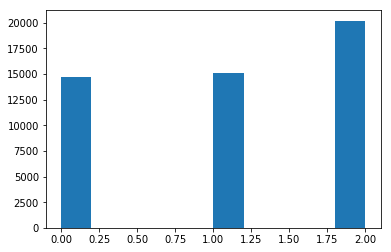

In [66]:
import matplotlib.pyplot as plt
plt.hist(y_new)
plt.show()

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
print('Shape of Sparse Matrix: ', X.shape)

Shape of Sparse Matrix:  (50000, 66911)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=92)

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2841    0 1057]
 [ 450    0  639]
 [ 240    0 4773]]


             precision    recall  f1-score   support

          0       0.80      0.73      0.76      3898
          1       0.00      0.00      0.00      1089
          2       0.74      0.95      0.83      5013

avg / total       0.68      0.76      0.71     10000



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=92)

clf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2954    0  944]
 [ 531   15  543]
 [ 375    0 4638]]


             precision    recall  f1-score   support

          0       0.77      0.76      0.76      3898
          1       1.00      0.01      0.03      1089
          2       0.76      0.93      0.83      5013

avg / total       0.79      0.76      0.72     10000



In [67]:
X_new = TruncatedSVD(n_components=50).fit_transform(X)
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20, random_state=92)

clf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[1924  519  425]
 [ 781 1237 1085]
 [ 239  544 3246]]


             precision    recall  f1-score   support

          0       0.65      0.67      0.66      2868
          1       0.54      0.40      0.46      3103
          2       0.68      0.81      0.74      4029

avg / total       0.63      0.64      0.63     10000



# DO NOT USE ANYTHING BELOW

In [5]:
#TODO:
#1) Stemming 
#2) Lemmization
#3) Change output space to categories (pos, neutral, neg)
#4) Evaluate model as a classification 

import string
en_stop = get_stop_words('en') #FIXME: No is considered a stop word
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in en_stop]
print(text_process(X[0]))
print(X[0])

['movie', 'gets', 'respect', 'sure', 'lot', 'memorable', 'quotes', 'listed', 'gem', 'Imagine', 'movie', 'Joe', 'Piscopo', 'actually', 'funny', 'Maureen', 'Stapleton', 'scene', 'stealer', 'Moroni', 'character', 'absolute', 'scream', 'Watch', 'Alan', 'Skipper', 'Hale', 'jr', 'police', 'Sgt']
For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.


In [6]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)
print(len(bow_transformer.vocabulary_))

214905


In [7]:
X = bow_transformer.transform(X)
print('Shape of Sparse Matrix: ', X.shape)
X = TruncatedSVD(n_components=50).fit_transform(X)

Shape of Sparse Matrix:  (50000, 214905)


In [8]:
print('Shape of Sparse Matrix: ', X.shape)
#print('Amount of Non-Zero occurences: ', X.nnz)
#density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
#print('density: {}'.format((density)))

Shape of Sparse Matrix:  (50000, 500)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=92)

In [10]:
clf = RandomForestRegressor(n_estimators=50).fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print(rmse)

2.912956710655954


In [14]:
# en_stop = get_stop_words('en')
# tokenizer = RegexpTokenizer(r'\w+')
# p_stemmer = PorterStemmer()
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(data['text'])
# X = TruncatedSVD(n_components=50).fit_transform(X)

In [5]:
# X

array([[ 3.19288695, -0.05305406, -0.66116401, ...,  0.10113894,
         0.33951692,  0.41442783],
       [11.59245027, -3.23250713, -0.11666337, ..., -0.25401356,
         0.39181239,  1.31366485],
       [ 6.51584894, -1.85851634,  0.03288393, ..., -0.62419326,
        -0.28197579,  0.17419579],
       ...,
       [32.58961625,  0.23972314, -0.59841473, ...,  0.29780136,
        -0.78280033,  0.86414643],
       [23.1264474 ,  1.12994973, -2.75848689, ..., -0.91031717,
         0.22480928, -0.09767869],
       [ 2.69147608, -0.26845077, -0.35913667, ...,  0.52262555,
        -0.03752499,  0.26628965]])

In [11]:
#min_max_scaler = preprocessing.MinMaxScaler()
#y = min_max_scaler.fit_transform([data['rating']])
#y = data['rating']
#df = df/df.max().astype(np.float64)
#y = y/y.max()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=92)

In [13]:
clf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print(rmse)

3.1077622710454116


In [ ]:
#clf = SVR(kernel='rbf').fit(X_train, y_train)
#y_pred = clf.predict(X_test)
#np.sqrt(mean_squared_error(y_pred, y_test))